In [1]:
from tdc.single_pred import HTS
data = HTS(name = 'HIV')
split = data.get_split()

ModuleNotFoundError: No module named 'tdc'

In [1]:
!pip install pandas

     ---------------------------------------- 10.0/10.0 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 5.3 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import rdkit

In [3]:
split.keys()

NameError: name 'split' is not defined

In [9]:
df_hts_train= split["train"].copy()
df_hts_valid= split["valid"].copy()
df_hts_test= split["test"].copy()

In [10]:
df_hts_train.head()

Drug_ID                                               Drug  Y
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0
3  Drug 6                                    O=C(O)c1ccccc1O  0
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0

In [11]:
df_hts_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28789 entries, 0 to 28788
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Drug_ID  28789 non-null  object
 1   Drug     28789 non-null  object
 2   Y        28789 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 674.9+ KB


In [16]:
#Y stands for acitivity (0: Inactive, 1: Active)
df_hts_train["Y"].value_counts()

0    27800
1      989
Name: Y, dtype: int64

In [21]:
(989/(28789))*100

3.435339886762305

In [19]:
df_hts_valid.head()

Drug_ID                                           Drug  Y
0   Drug 7835          Cc1c2ccnc(C#N)c2c(C)c2c1[nH]c1ccccc12  0
1  Drug 35410       CN(C)c1ccc(C(Cc2ccccc2)C2NC(=S)NC2=O)cc1  0
2  Drug 34952  CC(C)=CCOc1cc(O)c2c(O)c3c(cc2c1)CC(C)(C)CC3=O  0
3  Drug 36154                          O=c1onc2c3ccccc3ncn12  0
4  Drug 35825              COc1ccccc1-c1n[nH]c(-c2ccccc2O)n1  0

In [20]:
df_hts_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Drug_ID  4113 non-null   object
 1   Drug     4113 non-null   object
 2   Y        4113 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 96.5+ KB


In [22]:
df_hts_valid["Y"].value_counts()

0    3956
1     157
Name: Y, dtype: int64

In [24]:
(157/4113)*100

3.817165086311695

In [25]:
df_hts_test.head()

Drug_ID                                               Drug  Y
0  Drug 24748  O=C1C(=Cc2ccc(O)cc2)N=C(c2ccccc2)N1n1c(-c2cccc...  0
1  Drug 25440  Cc1c(CCN=P(c2ccccc2)(c2ccccc2)c2ccccc2)c(=O)n2...  0
2   Drug 9889                   O=C1OC(=O)C2C3CCCCC3=C3CCCCC3C12  0
3  Drug 17972           CC(=O)NC(ON1C(=O)COc2ccccc21)C(Cl)(Cl)Cl  0
4  Drug 15331  COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...  0

In [26]:
df_hts_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225 entries, 0 to 8224
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Drug_ID  8225 non-null   object
 1   Drug     8225 non-null   object
 2   Y        8225 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 192.9+ KB


In [27]:
df_hts_test["Y"].value_counts()

0    7928
1     297
Name: Y, dtype: int64

In [28]:
(297/8225)*100

3.610942249240122

In [29]:
#The data splits are equally distributed, with aproximately 3.5% of active drugs in each split
#The "Drug" column needs to be transformed to get more information.

In [32]:
df_hts_train.to_csv("C:/Users/Andreu/Desktop/DS Working folder/Github Data Science/ds_ft_sep_22/3-Machine_Learning/Proyecto/Nueva carpeta/src/data/df_hts_train_raw.csv", index=False)

In [33]:
df_hts_valid.to_csv("C:/Users/Andreu/Desktop/DS Working folder/Github Data Science/ds_ft_sep_22/3-Machine_Learning/Proyecto/Nueva carpeta/src/data/raw/df_hts_valid_raw.csv", index=False)

In [34]:
df_hts_test.to_csv("C:/Users/Andreu/Desktop/DS Working folder/Github Data Science/ds_ft_sep_22/3-Machine_Learning/Proyecto/Nueva carpeta/src/data/raw/df_hts_test_raw.csv", index=False)

In [36]:
#rdkit is a usefool tool to extract and work chemical information

In [3]:
from rdkit import Chem

In [5]:
df_train= pd.read_csv("C:/Users/Andreu/Desktop/DS Working folder/Github Data Science/ds_ft_sep_22/3-Machine_Learning/Proyecto/Nueva carpeta/src/data/raw/df_hts_train_raw.csv")

In [6]:
df_train

Drug_ID                                               Drug  Y
0          Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0
1          Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0
2          Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0
3          Drug 6                                    O=C(O)c1ccccc1O  0
4          Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0
...           ...                                                ... ..
28784  Drug 41119  Cc1ccc(N2C(=O)C3c4[nH]c5ccc(C)cc5c4C4CCC(C(C)(...  0
28785  Drug 41122  CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...  0
28786  Drug 41123  Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...  0
28787  Drug 41125  Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...  0
28788  Drug 41126  CCCCCC=C(c1cc(Cl)c(OC)c(-c2nc(C)no2)c1)c1cc(Cl...  0

[28789 rows x 3 columns]

In [6]:
df_train= df_train[["Drug", "Y"]]

In [7]:
df_train
#drug column represents the molecule in SMILES format

Drug_ID                                               Drug  Y
0          Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0
1          Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0
2          Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0
3          Drug 6                                    O=C(O)c1ccccc1O  0
4          Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0
...           ...                                                ... ..
28784  Drug 41119  Cc1ccc(N2C(=O)C3c4[nH]c5ccc(C)cc5c4C4CCC(C(C)(...  0
28785  Drug 41122  CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...  0
28786  Drug 41123  Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...  0
28787  Drug 41125  Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...  0
28788  Drug 41126  CCCCCC=C(c1cc(Cl)c(OC)c(-c2nc(C)no2)c1)c1cc(Cl...  0

[28789 rows x 3 columns]

In [8]:
df_train['mol'] = df_train['Drug'].apply(lambda x: Chem.MolFromSmiles(x))
#Creates a "mol" object from the SMILES string 

[16:37:09] WARNING: not removing hydrogen atom without neighbors
[16:37:09] WARNING: not removing hydrogen atom without neighbors


In [9]:
df_train

Drug_ID                                               Drug  Y  \
0          Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1          Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2          Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3          Drug 6                                    O=C(O)c1ccccc1O  0   
4          Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   
...           ...                                                ... ..   
28784  Drug 41119  Cc1ccc(N2C(=O)C3c4[nH]c5ccc(C)cc5c4C4CCC(C(C)(...  0   
28785  Drug 41122  CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...  0   
28786  Drug 41123  Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...  0   
28787  Drug 41125  Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...  0   
28788  Drug 41126  CCCCCC=C(c1cc(Cl)c(OC)c(-c2nc(C)no2)c1)c1cc(Cl...  0   

                                                     mol  
0      <rdkit.Chem.rdchem.Mol object at 0x00000200DD5...  
1      <rdkit.Chem.rdchem.Mol object at 0x00000200DD5...  
2      <rdkit.Chem.rdchem.Mol object at 0x00000200DD5...  
3      <rdkit.Chem.rdchem.Mol object at 0x00000200DD5...  
4      <rdkit.Chem.rdchem.Mol object at 0x00000200DD5...  
...                                                  ...  
28784  <rdkit.Chem.rdchem.Mol object at 0x00000200DB7...  
28785  <rdkit.Chem.rdchem.Mol object at 0x00000200DB7...  
28786  <rdkit.Chem.rdchem.Mol object at 0x00000200DB7...  
28787  <rdkit.Chem.rdchem.Mol object at 0x00000200DB7...  
28788  <rdkit.Chem.rdchem.Mol object at 0x00000200DB7...  

[28789 rows x 4 columns]

In [10]:
from rdkit.Chem import Draw
mols = df_train['mol'][:20]

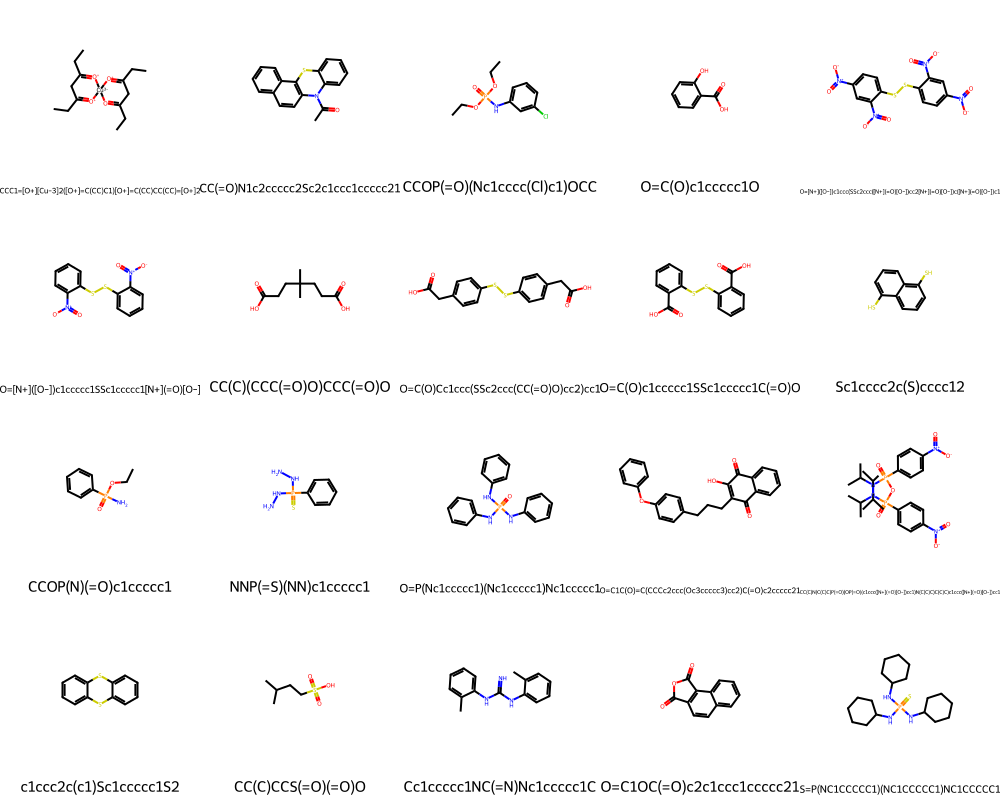

In [11]:
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df_train['Drug'][:20].values))
#draws molecules from "mol" object

In [13]:
df_train['mol'] = df_train['mol'].apply(lambda x: Chem.AddHs(x)) #Adds H atoms to the mol objects
df_train['num_of_atoms'] = df_train['mol'].apply(lambda x: x.GetNumAtoms()) #Extracts the number of atoms
df_train['num_of_heavy_atoms'] = df_train['mol'].apply(lambda x: x.GetNumHeavyAtoms()) #Extracts the number of heavy atoms

In [14]:
df_train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol  num_of_atoms  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            43   
1  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            34   
2  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            31   
3  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            16   
4  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            32   

   num_of_heavy_atoms  
0                  19  
1                  21  
2                  16  
3                  10  
4                  26

In [4]:
from rdkit.Chem import Descriptors

In [16]:
df_train['tpsa'] = df_train['mol'].apply(lambda x: Descriptors.TPSA(x)) #Surface area
df_train['mol_w'] = df_train['mol'].apply(lambda x: Descriptors.ExactMolWt(x)) #Molecular weight
df_train['num_valence_electrons'] = df_train['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))#Valence electrons
df_train['num_heteroatoms'] = df_train['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))#Number of heteroatoms

In [ ]:
df_train["mol"][0].apply(lambda x: Descriptors.)

In [17]:
df_train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol  num_of_atoms  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            43   
1  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            34   
2  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            31   
3  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            16   
4  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            32   

   num_of_heavy_atoms    tpsa       mol_w  num_valence_electrons  \
0                  19   45.20  319.096508                    114   
1                  21   20.31  291.071785                    102   
2                  16   47.56  263.047808                     90   
3                  10   57.53  138.031694                     52   
4                  26  172.56  397.962705                    134   

   num_heteroatoms  
0                5  
1                3  
2                6  
3                3  
4               14

In [18]:
df_train["Morgan"]= df_train["mol"].apply(lambda x: Descriptors.FpDensityMorgan1(x)) #Morgan density fingerprint

In [19]:
df_train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol  num_of_atoms  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            43   
1  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            34   
2  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            31   
3  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            16   
4  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            32   

   num_of_heavy_atoms    tpsa       mol_w  num_valence_electrons  \
0                  19   45.20  319.096508                    114   
1                  21   20.31  291.071785                    102   
2                  16   47.56  263.047808                     90   
3                  10   57.53  138.031694                     52   
4                  26  172.56  397.962705                    134   

   num_heteroatoms    Morgan  
0                5  0.842105  
1                3  1.047619  
2                6  1.625000  
3                3  1.600000  
4               14  0.653846

In [5]:
from rdkit.Chem import AllChem

In [21]:
#Extended Connecitivity fingerprints: converts SMILES to bits (from a mol object). Returns vectors
#Also known as Morgan Fingerprints
radius=3 #usually 2 or 3, but 3 is more recommended for ML, while 2 for more simple tasks like drawing or comparing substructures
nBits=1024 #most commonly used are 1024 and 2048

ECFP6 = [AllChem.GetMorganFingerprintAsBitVect(x,radius=radius, nBits=nBits) for x in df_train["mol"]]

In [22]:
ECFP6[0] #Morgan fingerprint of molecule with index 0

In [23]:
len(ECFP6[0]) #total lenght of a vector. 1024 bits as expected. Each bit can be a 0 or a 1

1024

In [24]:
ECFP6[0][0]

0

In [25]:
#Extract the bits from each vector into a pandas df.
columns = [f'Bit_{i}' for i in range(nBits)]
ecfp6_bits = [list(l) for l in ECFP6]
df_morgan = pd.DataFrame(ecfp6_bits, index = df_train["mol"], columns=columns)
df_morgan.head()

Bit_0  Bit_1  Bit_2  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      1      0   

                                                    Bit_3  Bit_4  Bit_5  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   

                                                    Bit_6  Bit_7  Bit_8  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   

                                                    Bit_9  ...  Bit_1014  \
mol                                                        ...             
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   

                                                    Bit_1015  Bit_1016  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_1017  Bit_1018  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_1019  Bit_1020  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         1   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_1021  Bit_1022  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rd

In [26]:
df_morgan_1024 = df_morgan

In [27]:
df_morgan_1024.head()

Bit_0  Bit_1  Bit_2  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      1      0   

                                                    Bit_3  Bit_4  Bit_5  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   

                                                    Bit_6  Bit_7  Bit_8  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   

                                                    Bit_9  ...  Bit_1014  \
mol                                                        ...             
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   

                                                    Bit_1015  Bit_1016  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_1017  Bit_1018  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_1019  Bit_1020  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         1   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_1021  Bit_1022  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rd

In [28]:
radius=3 #usually 2 or 3, but 3 is more recommended for ML, while 2 for more simple tasks like drawing or comparing substructures
nBits=2048 #most commonly used are 1024 and 2048

ECFP6_2048 = [AllChem.GetMorganFingerprintAsBitVect(x,radius=radius, nBits=nBits) for x in df_train["mol"]]

In [29]:
columns = [f'Bit_{i}' for i in range(nBits)]
ecfp6_bits = [list(l) for l in ECFP6_2048]
df_morgan_2048 = pd.DataFrame(ecfp6_bits, index = df_train["mol"], columns=columns)
df_morgan_2048.head()

Bit_0  Bit_1  Bit_2  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   

                                                    Bit_3  Bit_4  Bit_5  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   

                                                    Bit_6  Bit_7  Bit_8  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0      0      0   

                                                    Bit_9  ...  Bit_2038  \
mol                                                        ...             
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...      0  ...         0   

                                                    Bit_2039  Bit_2040  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_2041  Bit_2042  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_2043  Bit_2044  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         1   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   

                                                    Bit_2045  Bit_2046  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB7...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x00000200DBB8...         0         0   
<rdkit.Chem.rd

In [36]:
#mol2vec is a tool inspired by NLP. It creates embeddings similar to what word2vec does with words
!pip install git+https://github.com/samoturk/mol2vec

  Cloning https://github.com/samoturk/mol2vec to c:\users\andreu\appdata\local\temp\pip-req-build-4oydvyws
  Resolved https://github.com/samoturk/mol2vec to commit 850d944d5f48a58e26ed0264332b5741f72555aa
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached gensim-4.2.0-cp37-cp37m-win_amd64.whl (24.0 MB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
     ---------------------------------------- 34.1/34.1 MB 5.7 MB/s eta 0:00:00
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
     -------------------------------------- 983.8/983.8 kB 4.8 MB/s eta 0:00:00
  Created wheel for mol2vec: filename=mol2vec-0.1-py3-none-any.whl size=14104 sha256=b60cde597e5a3fedd9ecbefaaac02a2425d6363200372f1ed30ab168f969480f
  Stored in directory: C:\Users\Andreu\AppData\Local\Temp\pip-ephem-wheel-cache-f7__8_88\wheels\8

  Running command git clone --filter=blob:none --quiet https://github.com/samoturk/mol2vec 'C:\Users\Andreu\AppData\Local\Temp\pip-req-build-4oydvyws'


In [7]:
from gensim.models import word2vec
#this model is a word2vec trained with molecular fragments to embed them as "words"
#deprecated


In [31]:
model = word2vec.Word2Vec.load('../utils/model_300dim.pkl')

In [8]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec


In [33]:
print('Molecular sentence:', mol2alt_sentence(df_train['mol'][0], radius=1))
print('MolSentence object:', MolSentence(mol2alt_sentence(df_train['mol'][0], radius=1)))
print('DfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(df_train['mol'][0], radius=1)), model, unseen='UNK')))
#incompatibility, deprecated or not supported anymore

Molecular sentence: ['2246728737', '245196591', '2245384272', '934143565', '3217380708', '2712954663', '3189554341', '550725541', '42119399', '579608548', '3189554341', '550725541', '3217380708', '2712954663', '2245384272', '934143565', '2246728737', '245196591', '2968968094', '1662886308', '3189554341', '550725541', '3217380708', '2712954663', '2245384272', '934143565', '2246728737', '245196591', '2968968094', '1662886308', '3217380708', '2712954663', '2245384272', '934143565', '2246728737', '245196591', '3189554341', '550725541', '4277593716', '3321501787', '4277593716', '3321501787', '4277593716', '3321501787', '4277593716', '3309593724', '4277593716', '3309593724', '4277593716', '3309593724', '4277593716', '3309593724', '4277593716', '3321501787', '4277593716', '3321501787', '4277593716', '3321501787', '4277593716', '921082158', '4277593716', '921082158', '4277593716', '3309593724', '4277593716', '3309593724', '4277593716', '3321501787', '4277593716', '3321501787', '4277593716', '3

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [6]:
from rdkit.Chem import Descriptors

In [40]:
# https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors
# descriptors starting with fr_ are used to operate only with molecular fragments
Descriptors._descList

[('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>),
 ('MinAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>),
 ('qed',
  <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.HeavyAtomMolWt(x)>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons(mol)>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons(mol)>),
 ('MaxPartialCharge',
  <function rdkit.Chem.Descriptors.MaxPartialCharge(mo

In [44]:
Descriptors.descList[0]

'MaxEStateIndex'

In [45]:
desc= []
for x in Descriptors._descList:
    if x[0].startswith("fr_"):
        continue
    else:
        desc.append(x[0])

In [47]:
print(desc)
#for reference on each descriptor https://datagrok.ai/help/domains/chem/descriptors

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'Slo

In [49]:
Descriptors.MaxEStateIndex(df_train["mol"][0])

8.284752338435375

In [50]:
Descriptors.MinEStateIndex(df_train["mol"][0])

-5.42042824074074

In [51]:
Descriptors.MinEStateIndex??

Signature: Descriptors.MinEStateIndex(mol, force=1)
Docstring: <no docstring>
Source:   
def MinEStateIndex(mol, force=1):
  return min(EStateIndices(mol, force))
File:      c:\users\andreu\anaconda3\envs\rdkit\lib\site-packages\rdkit\chem\estate\estate.py
Type:      function


In [ ]:
#Not sure what EState functions do, I assume it is related to Excitation State.
#If so, this property is not relevant for the purpose of this prjoect since no reactions are involved
#Edit: Need to read some papers


In [61]:
#Quantitative estimation of Drug-likeliness. Estimates the probability if a molecule possess 
#drug-like features or not. This descriptor might be useful for ML
Descriptors.qed(df_train["mol"][0]), Descriptors.qed(df_train["mol"][8])

(0.4343577626448334, 0.8164911337226565)

In [78]:
df_train["qed"] = df_train["mol"].apply(lambda x: Descriptors.qed(x))

[21:20:08] WARNING: not removing hydrogen atom without neighbors
[21:20:08] WARNING: not removing hydrogen atom without neighbors


In [79]:
df_train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol  num_of_atoms  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            43   
1  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            34   
2  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            31   
3  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            16   
4  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            32   

   num_of_heavy_atoms    tpsa       mol_w  num_valence_electrons  \
0                  19   45.20  319.096508                    114   
1                  21   20.31  291.071785                    102   
2                  16   47.56  263.047808                     90   
3                  10   57.53  138.031694                     52   
4                  26  172.56  397.962705                    134   

   num_heteroatoms    Morgan  \
0                5  0.842105   
1                3  1.047619   
2                6  1.625000   
3                3  1.600000   
4               14  0.653846   

                                            sentence       qed  
0  (2246728737, 245196591, 2245384272, 934143565,...  0.434358  
1  (2246728737, 2113675549, 2246699815, 283456642...  0.581359  
2  (2246728737, 245196591, 2245384272, 219572169,...  0.790087  
3  (864942730, 1510328189, 2246699815, 2784506312...  0.610259  
4  (864942730, 2378779377, 848127915, 271903915, ...  0.374691

In [76]:
#Estimation of the maximum partial charge. A molecule might have a charge distribution 
# at different parts of the molecule, I am not sure if this is going to help. Besides, is giving nans
#in many of the molecules
Descriptors.MaxPartialCharge(df_train["mol"][1])

0.22799069028728408

In [80]:
#Number of hydrogen bond acceptors in the molecule
df_train["HBA"] = df_train["mol"].apply(lambda x: Descriptors.NumHAcceptors(x))

In [81]:
df_train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol  num_of_atoms  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            43   
1  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            34   
2  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            31   
3  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            16   
4  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            32   

   num_of_heavy_atoms    tpsa       mol_w  num_valence_electrons  \
0                  19   45.20  319.096508                    114   
1                  21   20.31  291.071785                    102   
2                  16   47.56  263.047808                     90   
3                  10   57.53  138.031694                     52   
4                  26  172.56  397.962705                    134   

   num_heteroatoms    Morgan  \
0                5  0.842105   
1                3  1.047619   
2                6  1.625000   
3                3  1.600000   
4               14  0.653846   

                                            sentence       qed  HBA  
0  (2246728737, 245196591, 2245384272, 934143565,...  0.434358    0  
1  (2246728737, 2113675549, 2246699815, 283456642...  0.581359    2  
2  (2246728737, 245196591, 2245384272, 219572169,...  0.790087    3  
3  (864942730, 1510328189, 2246699815, 2784506312...  0.610259    3  
4  (864942730, 2378779377, 848127915, 271903915, ...  0.374691   10

In [82]:
#Number of hydrogen bond donors in the molecule
df_train["HBD"] = df_train["mol"].apply(lambda x: Descriptors.NumHDonors(x))

In [83]:
df_train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol  num_of_atoms  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            43   
1  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            34   
2  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            31   
3  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            16   
4  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            32   

   num_of_heavy_atoms    tpsa       mol_w  num_valence_electrons  \
0                  19   45.20  319.096508                    114   
1                  21   20.31  291.071785                    102   
2                  16   47.56  263.047808                     90   
3                  10   57.53  138.031694                     52   
4                  26  172.56  397.962705                    134   

   num_heteroatoms    Morgan  \
0                5  0.842105   
1                3  1.047619   
2                6  1.625000   
3                3  1.600000   
4               14  0.653846   

                                            sentence       qed  HBA  HBD  
0  (2246728737, 245196591, 2245384272, 934143565,...  0.434358    0    0  
1  (2246728737, 2113675549, 2246699815, 283456642...  0.581359    2    0  
2  (2246728737, 245196591, 2245384272, 219572169,...  0.790087    3    1  
3  (864942730, 1510328189, 2246699815, 2784506312...  0.610259    3    2  
4  (864942730, 2378779377, 848127915, 271903915, ...  0.374691   10    0

In [84]:
#Calculated logP
df_train["logP"] = df_train["mol"].apply(lambda x: Descriptors.MolLogP(x))

In [85]:
df_train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol  num_of_atoms  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            43   
1  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            34   
2  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            31   
3  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            16   
4  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            32   

   num_of_heavy_atoms    tpsa       mol_w  num_valence_electrons  \
0                  19   45.20  319.096508                    114   
1                  21   20.31  291.071785                    102   
2                  16   47.56  263.047808                     90   
3                  10   57.53  138.031694                     52   
4                  26  172.56  397.962705                    134   

   num_heteroatoms    Morgan  \
0                5  0.842105   
1                3  1.047619   
2                6  1.625000   
3                3  1.600000   
4               14  0.653846   

                                            sentence       qed  HBA  HBD  \
0  (2246728737, 245196591, 2245384272, 934143565,...  0.434358    0    0   
1  (2246728737, 2113675549, 2246699815, 283456642...  0.581359    2    0   
2  (2246728737, 245196591, 2245384272, 219572169,...  0.790087    3    1   
3  (864942730, 1510328189, 2246699815, 2784506312...  0.610259    3    2   
4  (864942730, 2378779377, 848127915, 271903915, ...  0.374691   10    0   

     logP  
0  2.6669  
1  4.9890  
2  3.9330  
3  1.0904  
4  4.1188

In [96]:
#Calculated molar refractivity
df_train["MR"] = df_train["mol"].apply(lambda x: Descriptors.MolMR(x))

In [97]:
df_train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol  num_of_atoms  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            43   
1  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            34   
2  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            31   
3  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            16   
4  <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...            32   

   num_of_heavy_atoms    tpsa       mol_w  num_valence_electrons  \
0                  19   45.20  319.096508                    114   
1                  21   20.31  291.071785                    102   
2                  16   47.56  263.047808                     90   
3                  10   57.53  138.031694                     52   
4                  26  172.56  397.962705                    134   

   num_heteroatoms    Morgan  \
0                5  0.842105   
1                3  1.047619   
2                6  1.625000   
3                3  1.600000   
4               14  0.653846   

                                            sentence       qed  HBA  HBD  \
0  (2246728737, 245196591, 2245384272, 934143565,...  0.434358    0    0   
1  (2246728737, 2113675549, 2246699815, 283456642...  0.581359    2    0   
2  (2246728737, 245196591, 2245384272, 219572169,...  0.790087    3    1   
3  (864942730, 1510328189, 2246699815, 2784506312...  0.610259    3    2   
4  (864942730, 2378779377, 848127915, 271903915, ...  0.374691   10    0   

     logP       MR  
0  2.6669  70.4260  
1  4.9890  87.3330  
2  3.9330  65.9332  
3  1.0904  35.0661  
4  4.1188  91.2156

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28789 entries, 0 to 28788
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Drug_ID                28789 non-null  object 
 1   Drug                   28789 non-null  object 
 2   Y                      28789 non-null  int64  
 3   mol                    28789 non-null  object 
 4   num_of_atoms           28789 non-null  int64  
 5   num_of_heavy_atoms     28789 non-null  int64  
 6   tpsa                   28789 non-null  float64
 7   mol_w                  28789 non-null  float64
 8   num_valence_electrons  28789 non-null  int64  
 9   num_heteroatoms        28789 non-null  int64  
 10  Morgan                 28789 non-null  float64
 11  sentence               28789 non-null  object 
 12  qed                    28789 non-null  float64
 13  HBA                    28789 non-null  int64  
 14  HBD                    28789 non-null  int64  
 15  lo

In [100]:
df_train.describe()

Y  num_of_atoms  num_of_heavy_atoms          tpsa  \
count  28789.000000  28789.000000        28789.000000  28789.000000   
mean       0.034353     45.785057           25.548300     82.786149   
std        0.182138     23.740010           12.203986     63.545389   
min        0.000000      2.000000            2.000000      0.000000   
25%        0.000000     32.000000           18.000000     46.530000   
50%        0.000000     41.000000           23.000000     70.560000   
75%        0.000000     53.000000           30.000000    101.930000   
max        1.000000    413.000000          222.000000   1484.420000   

              mol_w  num_valence_electrons  num_heteroatoms        Morgan  \
count  28789.000000           28789.000000     28789.000000  28789.000000   
mean     370.293800             134.313974         7.007503      1.266399   
std      174.922899              65.181741         4.422626      0.363267   
min       26.014408               8.000000         0.000000      0.136646   
25%      266.151809              96.000000         4.000000      1.033333   
50%      333.089092             120.000000         6.000000      1.266667   
75%      427.193614             154.000000         8.000000      1.500000   
max     3408.552285            1248.000000       120.000000      3.000000   

                qed           HBA           HBD          logP            MR  
count  28789.000000  28789.000000  28789.000000  28789.000000  28789.000000  
mean       0.512106      5.313210      1.532808      2.981879     97.953789  
std        0.221001      3.439208      2.066310      2.565388     45.987849  
min        0.007284      0.000000      0.000000    -24.864600      6.862000  
25%        0.351008      3.000000      0.000000      1.563400     70.366400  
50%        0.533622      5.000000      1.000000      2.921800     89.116000  
75%        0.686984      6.000000      2.000000      4.278940    113.862400  
max        0.947141     98.000000     48.000000     43.443940    857.373800

In [101]:
import seaborn as sns

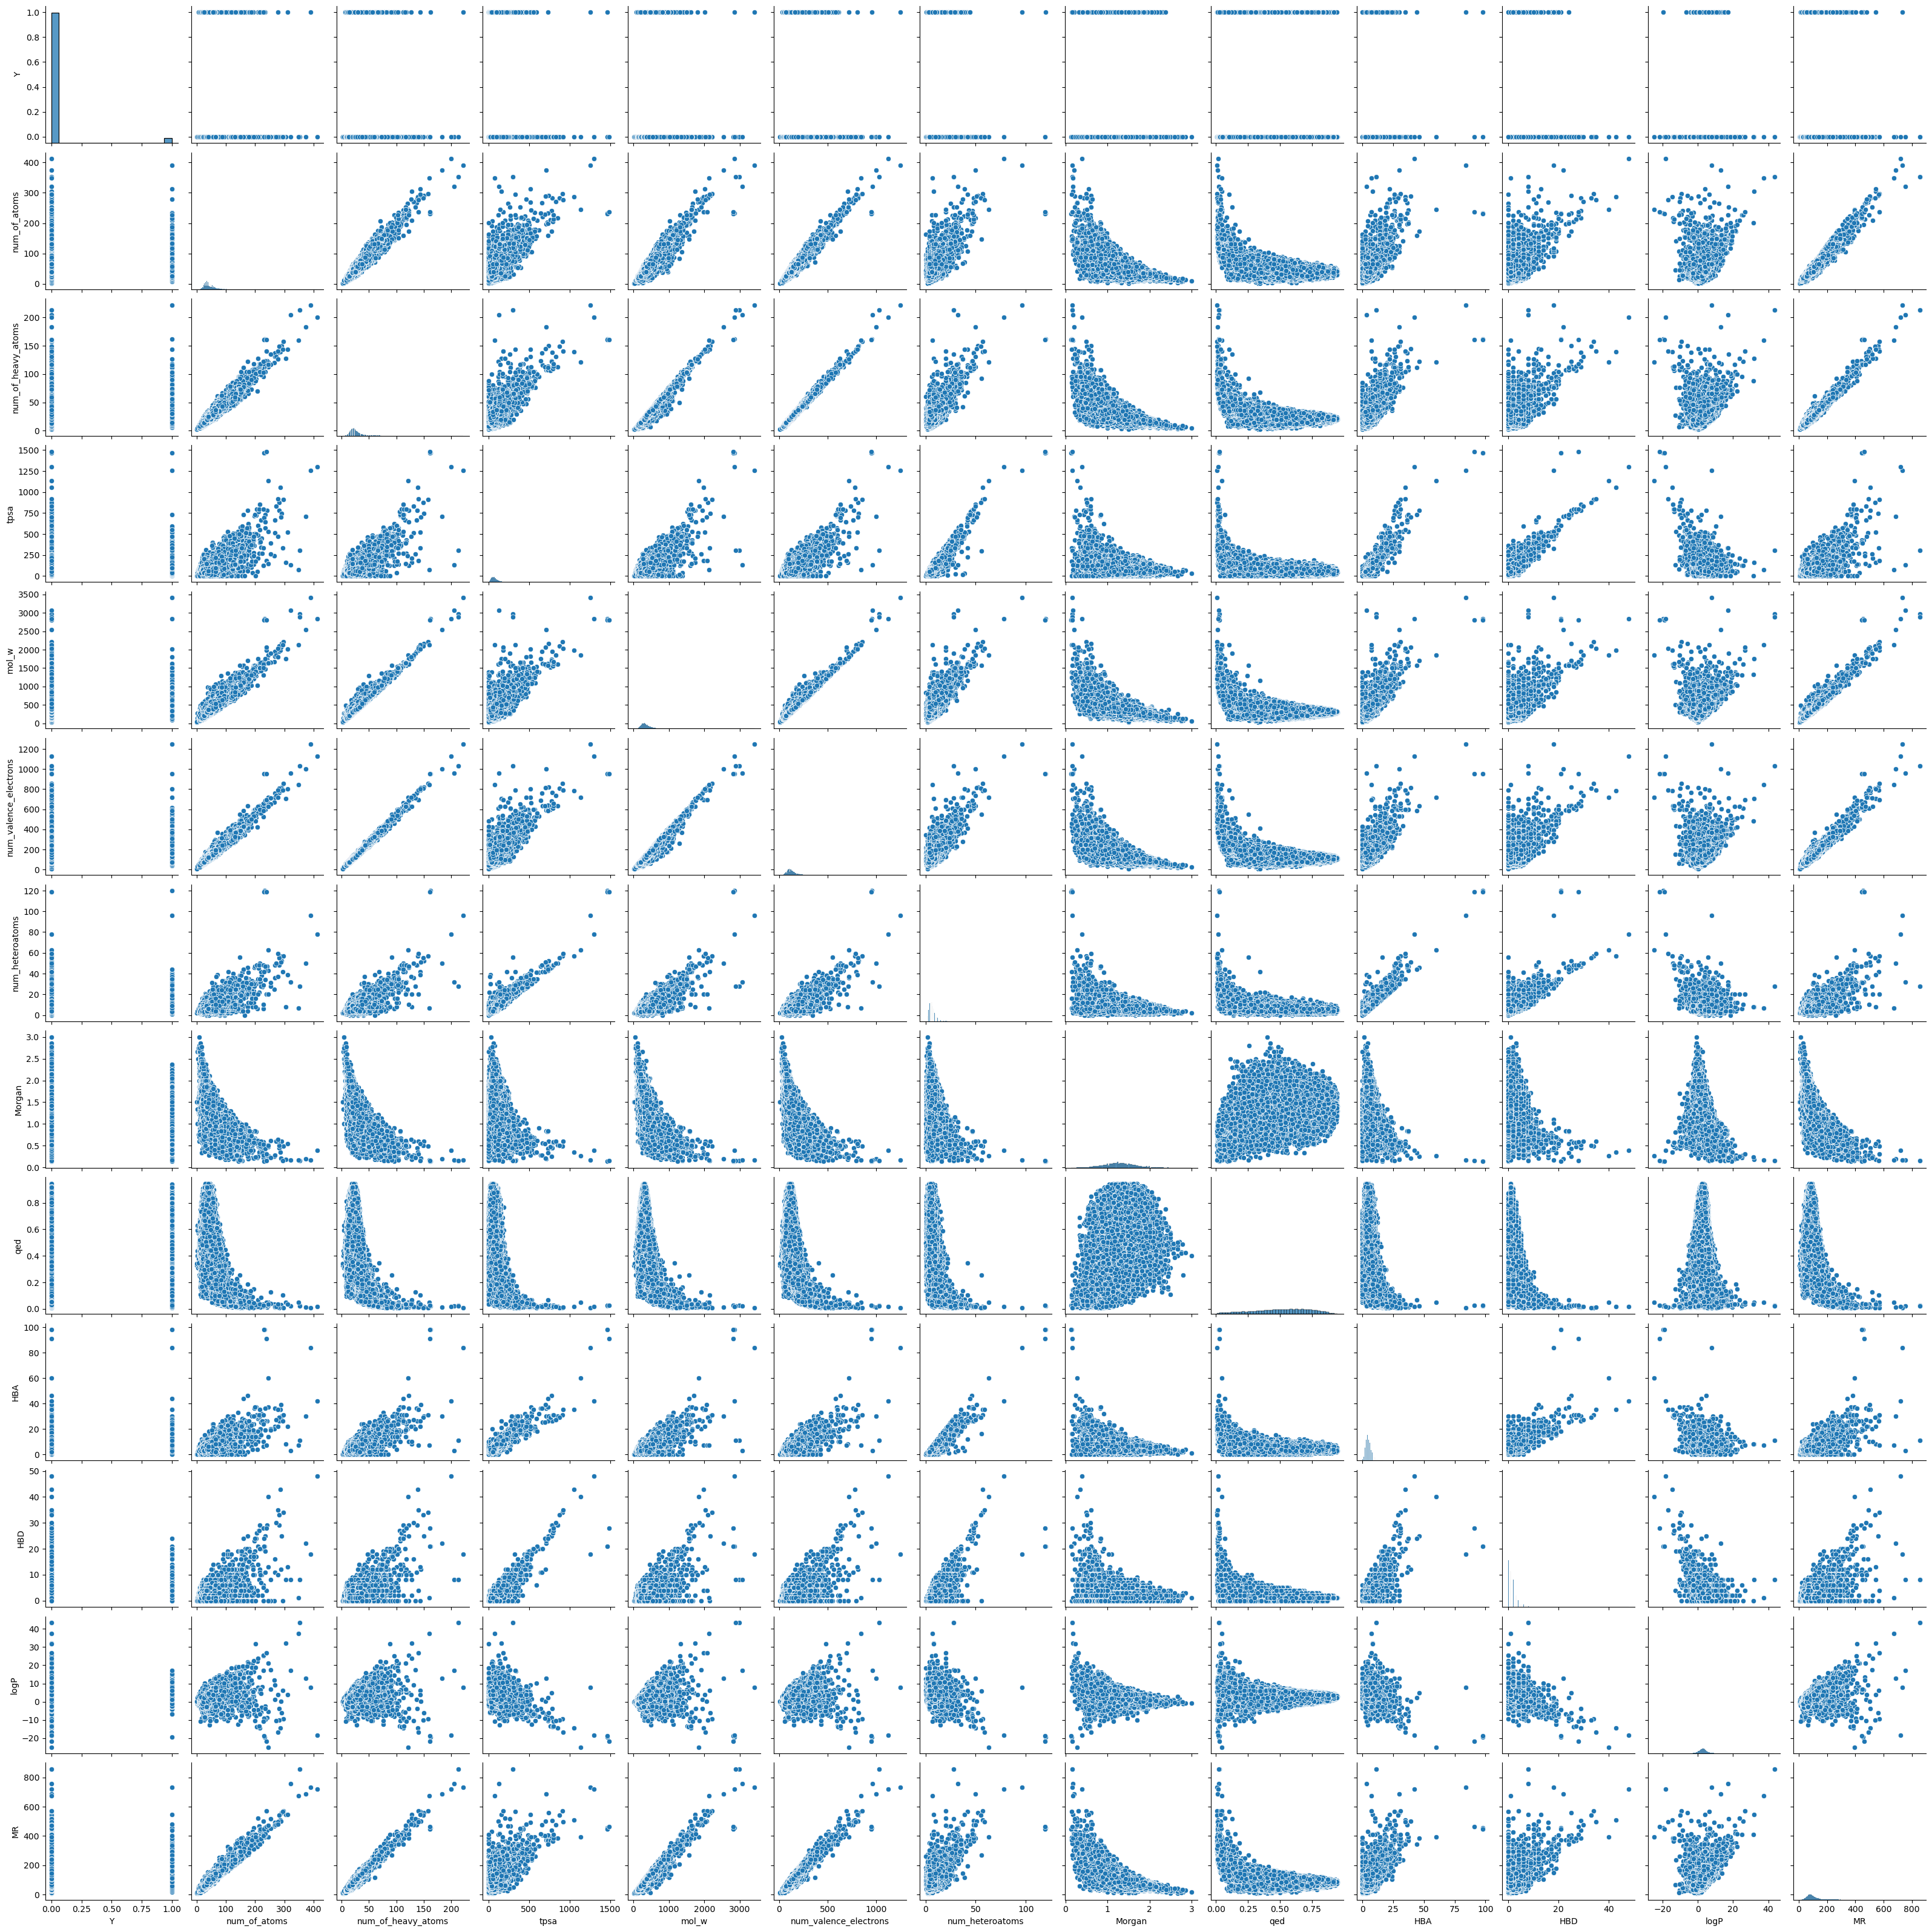

In [102]:
sns.pairplot(df_train)

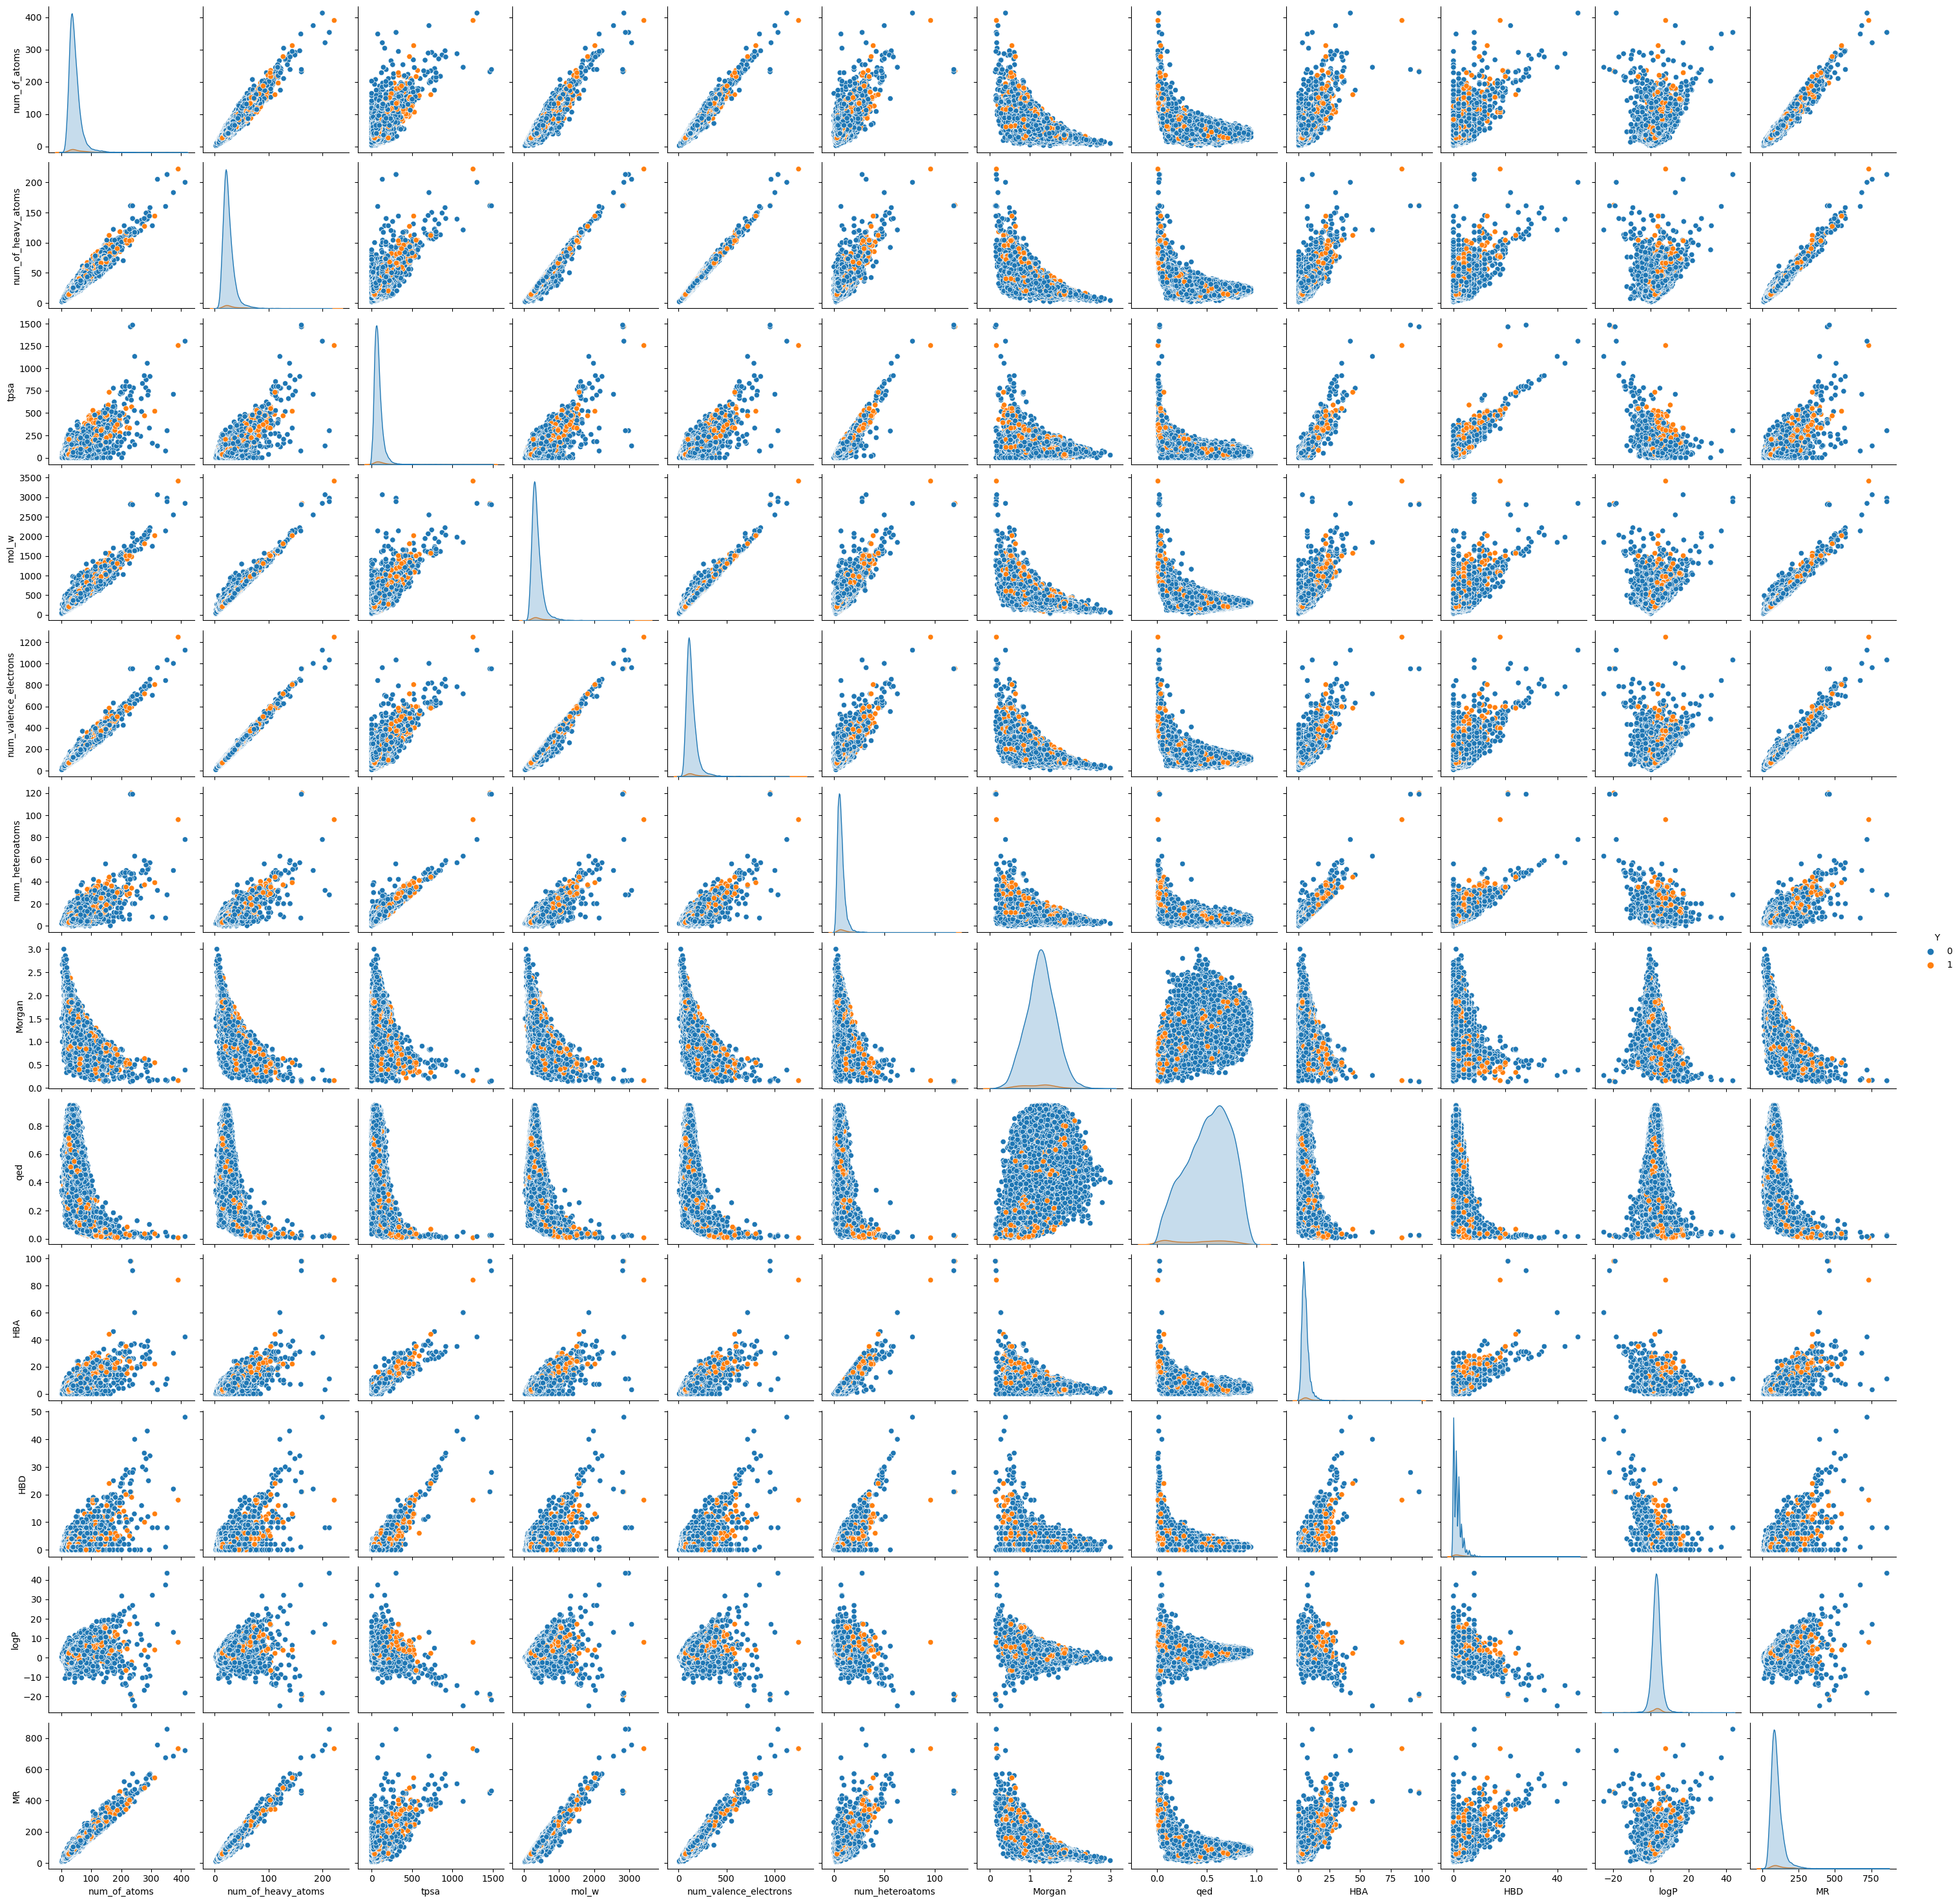

In [103]:
sns.pairplot(df_train, hue="Y")

In [104]:
df_train.corr()

Y  num_of_atoms  num_of_heavy_atoms      tpsa  \
Y                      1.000000      0.106320            0.129359  0.152078   
num_of_atoms           0.106320      1.000000            0.952122  0.596881   
num_of_heavy_atoms     0.129359      0.952122            1.000000  0.680922   
tpsa                   0.152078      0.596881            0.680922  1.000000   
mol_w                  0.137501      0.926860            0.976467  0.677812   
num_valence_electrons  0.128785      0.970422            0.993230  0.701333   
num_heteroatoms        0.156776      0.626017            0.733434  0.908682   
Morgan                -0.048237     -0.550624           -0.606806 -0.228653   
qed                   -0.086692     -0.549162           -0.594926 -0.512473   
HBA                    0.151124      0.604061            0.689742  0.893457   
HBD                    0.117039      0.471804            0.490530  0.801081   
logP                   0.053942      0.403933            0.404779 -0.242346   
MR                     0.122049      0.954166            0.981438  0.577010   

                          mol_w  num_valence_electrons  num_heteroatoms  \
Y                      0.137501               0.128785         0.156776   
num_of_atoms           0.926860               0.970422         0.626017   
num_of_heavy_atoms     0.976467               0.993230         0.733434   
tpsa                   0.677812               0.701333         0.908682   
mol_w                  1.000000               0.978274         0.775625   
num_valence_electrons  0.978274               1.000000         0.757048   
num_heteroatoms        0.775625               0.757048         1.000000   
Morgan                -0.595203              -0.579688        -0.310382   
qed                   -0.616609              -0.597150        -0.549641   
HBA                    0.693113               0.709478         0.891399   
HBD                    0.490960               0.518665         0.664320   
logP                   0.382354               0.365391        -0.120702   
MR                     0.964115               0.971316         0.642682   

                         Morgan       qed       HBA       HBD      logP  \
Y                     -0.048237 -0.086692  0.151124  0.117039  0.053942   
num_of_atoms          -0.550624 -0.549162  0.604061  0.471804  0.403933   
num_of_heavy_atoms    -0.606806 -0.594926  0.689742  0.490530  0.404779   
tpsa                  -0.228653 -0.512473  0.893457  0.801081 -0.242346   
mol_w                 -0.595203 -0.616609  0.693113  0.490960  0.382354   
num_valence_electrons -0.579688 -0.597150  0.709478  0.518665  0.365391   
num_heteroatoms       -0.310382 -0.549641  0.891399  0.664320 -0.120702   
Morgan                 1.000000  0.403636 -0.274914 -0.104422 -0.472710   
qed                    0.403636  1.000000 -0.493676 -0.380682 -0.202231   
HBA                   -0.274914 -0.493676  1.000000  0.608530 -0.134252   
HBD                   -0.104422 -0.380682  0.608530  1.000000 -0.285949   
logP                  -0.472710 -0.202231 -0.134252 -0.285949  1.000000   
MR                    -0.628015 -0.586336  0.598639  0.432712  0.511646   

                             MR  
Y                      0.122049  
num_of_atoms           0.954166  
num_of_heavy_atoms     0.981438  
tpsa                   0.577010  
mol_w                  0.964115  
num_valence_electrons  0.971316  
num_heteroatoms        0.642682  
Morgan                -0.628015  
qed                   -0.586336  
HBA                    0.598639  
HBD                    0.432712  
logP                   0.511646  
MR                     1.000000

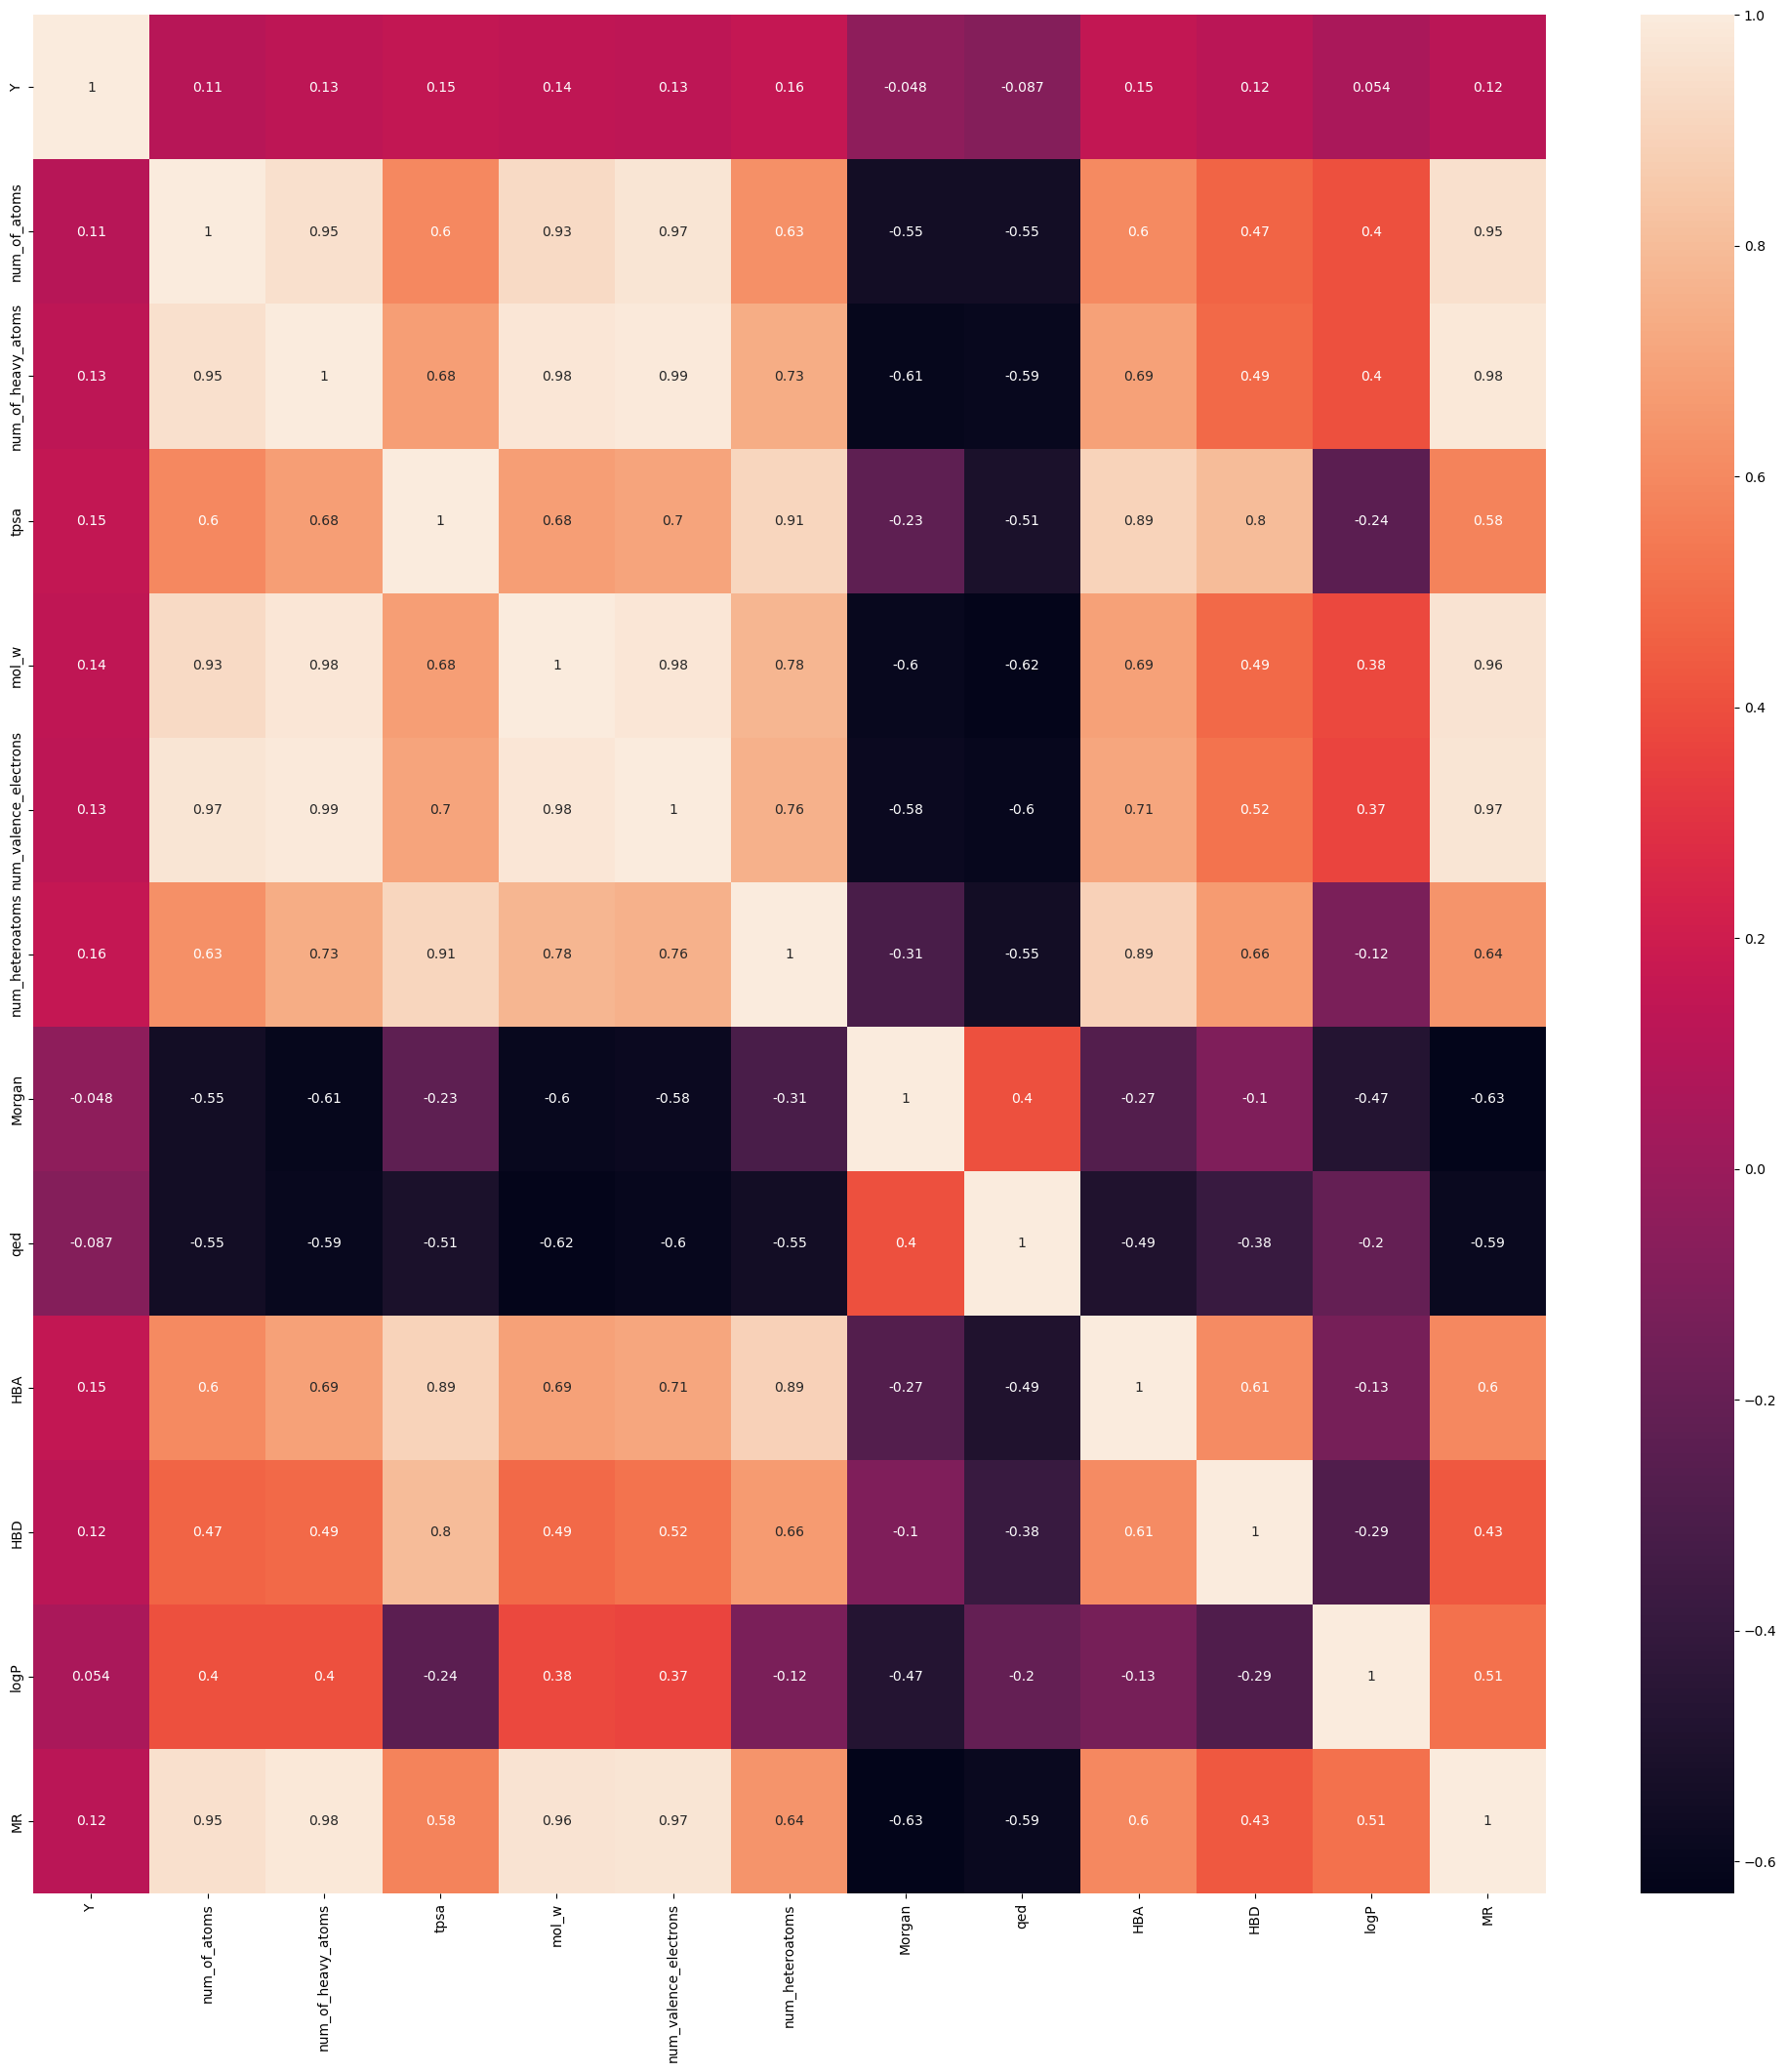

In [109]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(), annot=True)
plt.show();

None of the descriptors seems to have a strong correlation with the target. Moreover, many features intercorrelate (number of atoms,number of heavy atoms, mol weight). Those that correlate with molecular weight should be removed to reduce noise, since it is evident that the higher the number of atoms, the higher the mol weight.

The rest of features can be kept for building a model, even though it is likely that the main driver for accurate prediction is going to be the structure of the molecule extracted from its SMILES code

In [112]:
df_train.drop(columns=["num_of_atoms","num_of_heavy_atoms", "num_heteroatoms", "num_valence_electrons","sentence","Morgan"])

Drug_ID                                               Drug  Y  \
0          Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1          Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2          Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3          Drug 6                                    O=C(O)c1ccccc1O  0   
4          Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   
...           ...                                                ... ..   
28784  Drug 41119  Cc1ccc(N2C(=O)C3c4[nH]c5ccc(C)cc5c4C4CCC(C(C)(...  0   
28785  Drug 41122  CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...  0   
28786  Drug 41123  Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...  0   
28787  Drug 41125  Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...  0   
28788  Drug 41126  CCCCCC=C(c1cc(Cl)c(OC)c(-c2nc(C)no2)c1)c1cc(Cl...  0   

                                                     mol    tpsa       mol_w  \
0      <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...   45.20  319.096508   
1      <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...   20.31  291.071785   
2      <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...   47.56  263.047808   
3      <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...   57.53  138.031694   
4      <rdkit.Chem.rdchem.Mol object at 0x00000200DBB...  172.56  397.962705   
...                                                  ...     ...         ...   
28784  <rdkit.Chem.rdchem.Mol object at 0x00000200DBE...   53.17  454.262028   
28785  <rdkit.Chem.rdchem.Mol object at 0x00000200DBE...   56.41  379.225977   
28786  <rdkit.Chem.rdchem.Mol object at 0x00000200DBE...   71.63  484.236208   
28787  <rdkit.Chem.rdchem.Mol object at 0x00000200DBE...   53.17  440.246378   
28788  <rdkit.Chem.rdchem.Mol object at 0x00000200DBE...   96.30  542.148761   

            qed  HBA  HBD     logP        MR  
0      0.434358    0    0  2.66690   70.4260  
1      0.581359    2    0  4.98900   87.3330  
2      0.790087    3    1  3.93300   65.9332  
3      0.610259    3    2  1.09040   35.0661  
4      0.374691   10    0  4.11880   91.2156  
...         ...  ...  ...      ...       ...  
28784  0.420292    2    1  6.61754  135.9657  
28785  0.804191    3    1  3.94502  108.6697  
28786  0.427745    4    1  6.03782  137.3517  
28787  0.450949    2    1  6.30912  131.2287  
28788  0.187492    8    0  7.73944  143.2870  

[28789 rows x 11 columns]

In [116]:
df= pd.read_csv("C:/Users/Andreu/Desktop/DS Working folder/Github Data Science/ds_ft_sep_22/3-Machine_Learning/Proyecto/Nueva carpeta/src/data/raw/df_hts_train_raw.csv")

In [9]:
def descriptors_from_SMILES(df, SMILES, save_path):
    """
    This function gets common descriptors for molecules from SMILES.Returns dataframe

    df = dataframe to convert
    SMILES = name of the column from dataframe with SMILES coding for structures (string)
    save_path = path to save the directory
    """

    df['mol'] = df[SMILES].apply(lambda x: Chem.MolFromSmiles(x))
    df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x)) #Adds H atoms to the mol objects
    df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x)) #Surface area
    df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x)) #Molecular weight
    df["qed"] = df["mol"].apply(lambda x: Descriptors.qed(x))
    df["HBA"] = df["mol"].apply(lambda x: Descriptors.NumHAcceptors(x))
    df["HBD"] = df["mol"].apply(lambda x: Descriptors.NumHDonors(x))
    df["logP"] = df["mol"].apply(lambda x: Descriptors.MolLogP(x))
    df["MR"] = df["mol"].apply(lambda x: Descriptors.MolMR(x))

    df.to_csv(save_path, index=False)

    return df

In [119]:
train= descriptors_from_SMILES(df, "Drug", "../data/processed/train_w_desc.csv")

[11:06:56] WARNING: not removing hydrogen atom without neighbors
[11:06:56] WARNING: not removing hydrogen atom without neighbors
[11:07:54] WARNING: not removing hydrogen atom without neighbors
[11:07:54] WARNING: not removing hydrogen atom without neighbors


In [121]:
train.head()

Drug_ID                                               Drug  Y  \
0  Drug 0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...  0   
1  Drug 2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21  0   
2  Drug 5                         CCOP(=O)(Nc1cccc(Cl)c1)OCC  0   
3  Drug 6                                    O=C(O)c1ccccc1O  0   
4  Drug 8  O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...  0   

                                                 mol    tpsa       mol_w  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000201534...   45.20  319.096508   
1  <rdkit.Chem.rdchem.Mol object at 0x00000201534...   20.31  291.071785   
2  <rdkit.Chem.rdchem.Mol object at 0x00000201531...   47.56  263.047808   
3  <rdkit.Chem.rdchem.Mol object at 0x00000201531...   57.53  138.031694   
4  <rdkit.Chem.rdchem.Mol object at 0x00000201531...  172.56  397.962705   

        qed  HBA  HBD    logP       MR  
0  0.434358    0    0  2.6669  70.4260  
1  0.581359    2    0  4.9890  87.3330  
2  0.790087    3    1  3.9330  65.9332  
3  0.610259    3    2  1.0904  35.0661  
4  0.374691   10    0  4.1188  91.2156

In [17]:
df_valid= pd.read_csv("C:/Users/Andreu/Desktop/DS Working folder/Github Data Science/ds_ft_sep_22/3-Machine_Learning/Proyecto/Nueva carpeta/src/data/raw/df_hts_valid_raw.csv")

In [18]:
valid= descriptors_from_SMILES(df_valid, "Drug", "../data/processed/valid_w_desc.csv")

In [124]:
df_test=pd.read_csv("C:/Users/Andreu/Desktop/DS Working folder/Github Data Science/ds_ft_sep_22/3-Machine_Learning/Proyecto/Nueva carpeta/src/data/raw/df_hts_test_raw.csv")

In [125]:
test= descriptors_from_SMILES(df_test, "Drug", "../data/processed/test_w_desc.csv")

In [126]:
valid.head()

Drug_ID                                           Drug  Y  \
0   Drug 7835          Cc1c2ccnc(C#N)c2c(C)c2c1[nH]c1ccccc12  0   
1  Drug 35410       CN(C)c1ccc(C(Cc2ccccc2)C2NC(=S)NC2=O)cc1  0   
2  Drug 34952  CC(C)=CCOc1cc(O)c2c(O)c3c(cc2c1)CC(C)(C)CC3=O  0   
3  Drug 36154                          O=c1onc2c3ccccc3ncn12  0   
4  Drug 35825              COc1ccccc1-c1n[nH]c(-c2ccccc2O)n1  0   

                                                 mol   tpsa       mol_w  \
0  <rdkit.Chem.rdchem.Mol object at 0x000002014FB...  52.47  271.110947   
1  <rdkit.Chem.rdchem.Mol object at 0x000002014FB...  44.37  339.140533   
2  <rdkit.Chem.rdchem.Mol object at 0x000002014FB...  66.76  340.167459   
3  <rdkit.Chem.rdchem.Mol object at 0x000002014FB...  60.40  187.038176   
4  <rdkit.Chem.rdchem.Mol object at 0x000002014FB...  71.03  267.100777   

        qed  HBA  HBD     logP        MR  
0  0.516388    2    1  4.35782   85.2947  
1  0.821580    3    2  2.45180  101.3204  
2  0.791283    4    2  4.75110   98.6361  
3  0.522737    5    0  0.83570   49.0290  
4  0.765102    4    2  2.85290   75.4715

In [127]:
test.head()

Drug_ID                                               Drug  Y  \
0  Drug 24748  O=C1C(=Cc2ccc(O)cc2)N=C(c2ccccc2)N1n1c(-c2cccc...  0   
1  Drug 25440  Cc1c(CCN=P(c2ccccc2)(c2ccccc2)c2ccccc2)c(=O)n2...  0   
2   Drug 9889                   O=C1OC(=O)C2C3CCCCC3=C3CCCCC3C12  0   
3  Drug 17972           CC(=O)NC(ON1C(=O)COc2ccccc21)C(Cl)(Cl)Cl  0   
4  Drug 15331  COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...  0   

                                                 mol   tpsa       mol_w  \
0  <rdkit.Chem.rdchem.Mol object at 0x00000201538...  87.79  484.153541   
1  <rdkit.Chem.rdchem.Mol object at 0x00000201538...  73.42  526.192248   
2  <rdkit.Chem.rdchem.Mol object at 0x00000201538...  43.37  260.141245   
3  <rdkit.Chem.rdchem.Mol object at 0x00000201538...  67.87  351.978440   
4  <rdkit.Chem.rdchem.Mol object at 0x00000201538...  63.95  490.259835   

        qed  HBA  HBD     logP        MR  
0  0.373598    6    1  4.73520  143.7258  
1  0.283706    4    1  5.68110  161.1227  
2  0.381857    3    0  2.99280   69.0210  
3  0.667895    4    1  2.17600   78.4027  
4  0.368352    6    0  5.51488  138.9040

In [10]:
def morgan_fingerprint(df_mol, save_path, radius=3, nBits=1024):
    """ 
    df_mol = column of the dataframe with rdkit "mol" object
    svae_path = save to direcotry path
    radius = radius to generate fingerprints (2 or 3)
    nBits = number of bits of the fingerprints (1024 or 2048)

    returns Morgan fingerprints
    """

    ecfp = [AllChem.GetMorganFingerprintAsBitVect(x, radius=radius, nBits=nBits) for x in df_mol]

    columns = [f'Bit_{i}' for i in range(nBits)]
    ecfp6_bits = [list(l) for l in ecfp]
    fingerprints = pd.DataFrame(ecfp6_bits, index = df_mol, columns=columns)

    fingerprints.to_csv(save_path, index=False)

    return fingerprints



In [141]:
train_morganfp_1024= morgan_fingerprint(train["mol"], "../data/processed/train_morgan_1024.csv", 3, 1024)

In [139]:
train_morganfp_1024

Bit_0  Bit_1  Bit_2  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000201534A...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201534A...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      1      0   
...                                                   ...    ...    ...   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   

                                                    Bit_3  Bit_4  Bit_5  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000201534A...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201534A...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      0      0   
...                                                   ...    ...    ...   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      0   

                                                    Bit_6  Bit_7  Bit_8  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x00000201534A...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201534A...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0      0      0   
...                                                   ...    ...    ...   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0      0      1   

                                                    Bit_9  ...  Bit_1014  \
mol                                                        ...             
<rdkit.Chem.rdchem.Mol object at 0x00000201534A...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000201534A...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x00000201531F...      0  ...         0   
...                                                   ...  ...       ...   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015345...      0  ...         0   

                                                    Bit_1015  Bit_1016  \
mol                                                          

In [143]:
valid_morganfp_1024= morgan_fingerprint(valid["mol"], "../data/processed/valid_morgan_1024.csv", 3, 1024)

In [145]:
valid_morganfp_1024.head()

Bit_0  Bit_1  Bit_2  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      1      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   

                                                    Bit_3  Bit_4  Bit_5  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      1      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   

                                                    Bit_6  Bit_7  Bit_8  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0      0      0   

                                                    Bit_9  ...  Bit_1014  \
mol                                                        ...             
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0  ...         1   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...      0  ...         0   

                                                    Bit_1015  Bit_1016  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   

                                                    Bit_1017  Bit_1018  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   

                                                    Bit_1019  Bit_1020  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         1         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   

                                                    Bit_1021  Bit_1022  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002014FBF...         0         0   
<rdkit.Chem.rd

In [144]:
test_morganfp_1024= morgan_fingerprint(test["mol"], "../data/processed/test_morgan_1024.csv", 3, 1024)

In [146]:
test_morganfp_1024.head()

Bit_0  Bit_1  Bit_2  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x000002015386...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015386...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015389...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...      0      1      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...      0      1      0   

                                                    Bit_3  Bit_4  Bit_5  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x000002015386...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015386...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015389...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...      0      0      0   

                                                    Bit_6  Bit_7  Bit_8  \
mol                                                                       
<rdkit.Chem.rdchem.Mol object at 0x000002015386...      1      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015386...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015389...      0      0      1   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...      0      0      0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...      0      0      0   

                                                    Bit_9  ...  Bit_1014  \
mol                                                        ...             
<rdkit.Chem.rdchem.Mol object at 0x000002015386...      0  ...         1   
<rdkit.Chem.rdchem.Mol object at 0x000002015386...      0  ...         1   
<rdkit.Chem.rdchem.Mol object at 0x000002015389...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...      0  ...         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...      0  ...         0   

                                                    Bit_1015  Bit_1016  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x000002015386...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015386...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015389...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...         0         0   

                                                    Bit_1017  Bit_1018  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x000002015386...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015386...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015389...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...         0         0   

                                                    Bit_1019  Bit_1020  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x000002015386...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015386...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015389...         1         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015388...         0         0   

                                                    Bit_1021  Bit_1022  \
mol                                                                      
<rdkit.Chem.rdchem.Mol object at 0x000002015386...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015386...         0         0   
<rdkit.Chem.rdchem.Mol object at 0x000002015389...         0         0   
<rdkit.Chem.rd

In [147]:
import pickle

In [150]:
with open("../utils/desc_from_smiles.pkl", "wb") as save_file:
    pickle.dump(descriptors_from_SMILES, save_file)

In [151]:
with open("../utils/morgan_fp.pkl", "wb") as save_file2:
    pickle.dump(morgan_fingerprint, save_file2)

In [ ]:
#Transform smiles from drugs currently available in the market (ca. 10000 drugs)

In [90]:
drugs= pd.read_csv("../data/raw/repurposing_samples_20180907.txt", sep="\t")

In [137]:
drugs

broad_id  \
0      BRD-K89787693-001-01-1   
1      BRD-K88956297-003-01-9   
2      BRD-A86415025-050-01-0   
3      BRD-A95802703-001-01-0   
4      BRD-K96055017-003-02-7   
...                       ...   
10142  BRD-K64557645-001-02-4   
10143  BRD-K66353228-001-14-6   
10144  BRD-K66353228-001-13-8   
10145  BRD-K63068307-001-08-9   
10146  BRD-K28761384-300-01-0   

                                              pert_iname  qc_incompatible  \
0                           [sar9,met(o2)11]-substance-p                0   
1      1-((Z)-3-Chloroallyl)-1,3,5,7-tetraazaadamanta...                0   
2                  1-(1,2-Diphenylethyl)piperidine-(+/-)                0   
3      1-(2-chloro-5-methylphenoxy)-3-(isopropylamino...                0   
4                            1-acetyl-4-methylpiperazine                0   
...                                                  ...              ...   
10142                                           zotepine                0   
10143                                       zoxazolamine                0   
10144                                       zoxazolamine                0   
10145                                           ZSTK-474                0   
10146                                     zuclopenthixol                0   

       purity       vendor   catalog_no  \
0         NaN       Tocris         1178   
1       94.41    BidePharm      BD51690   
2       98.04       Tocris          360   
3       92.38      Enamine  Z1672746675   
4       90.28       Tocris          351   
...       ...          ...          ...   
10142   97.88    Prestwick  Prestw-1368   
10143   98.37  MicroSource      1504216   
10144   97.56      Selleck        S4233   
10145   98.66      Selleck        S1072   
10146   97.19    Prestwick   Prestw-998   

                                             vendor_name expected_mass  \
0      2-({5-amino-2-[({1-[6-amino-2-({[1-(2-amino-5-...      1,392.73   
1      1-((Z)-3-Chloroallyl)-1,3,5,7-tetraazaadamanta...       215.106   
2            (?)-1-(1,2-Diphenylethyl)piperidine maleate       265.183   
3      1-(2-chloro-5-methylphenoxy)-3-(isopropylamino...       257.118   
4              1-Acetyl-4-methylpiperazine hydrochloride       142.111   
...                                                  ...           ...   
10142                                           Zotepine        331.08   
10143                                       ZOXAZOLAMINE       168.009   
10144                                       Zoxazolamine       168.009   
10145                                            ZSTK474       417.172   
10146                     Zuclopenthixol dihydrochloride       400.138   

                                                  smiles  \
0      CC(C)C[C@H](NC(=O)CN(C)C(=O)[C@H](Cc1ccccc1)NC...   
1                        Cl\C=C/C[N+]12CN3CN(CN(C3)C1)C2   
2                         C(C(N1CCCCC1)c1ccccc1)c1ccccc1   
3                             CC(C)NCC(O)COc1cc(C)ccc1Cl   
4                                      CN1CCN(CC1)C(C)=O   
...                                                  ...   
10142                 CN(C)CCOC1=Cc2ccccc2Sc2ccc(Cl)cc12   
10143                                 Nc1nc2cc(Cl)ccc2o1   
10144                                 Nc1nc2cc(Cl)ccc2o1   
10145    FC(F)c1nc2ccccc2n1-c1nc(nc(n1)N1CCOCC1)N1CCOCC1   
10146        OCCN1CCN(CC\C=C2\c3ccccc3Sc3ccc(Cl)cc23)CC1   

                          InChIKey  pubchem_cid deprecated_broad_id  
0      OUPXSLGGCPUZJJ-SARDKLJWSA-N     163829.0                 NaN  
1      LDLCEGCJYSDJLX-UPHRSURJSA-N    5846454.0                 NaN  
2      JQWJJJYHVHNXJH-UHFFFAOYSA-N     206666.0                 NaN  
3      NJEIOWSBPCZKTL-UHFFFAOYSA-N   20497006.0                 NaN  
4      YSDBJKNOEWSFGA-UHFFFAOYSA-N     550758.0                 NaN  
...                            ...          ...                 ...  
10142  HDOZVRUNCMBHFH-UHFFFAOYSA-N       5736.0                 NaN  
10143  YGCOD

In [91]:
drugs.head()

broad_id                                         pert_iname  \
0  BRD-K89787693-001-01-1                       [sar9,met(o2)11]-substance-p   
1  BRD-K88956297-003-01-9  1-((Z)-3-Chloroallyl)-1,3,5,7-tetraazaadamanta...   
2  BRD-A86415025-050-01-0              1-(1,2-Diphenylethyl)piperidine-(+/-)   
3  BRD-A95802703-001-01-0  1-(2-chloro-5-methylphenoxy)-3-(isopropylamino...   
4  BRD-K96055017-003-02-7                        1-acetyl-4-methylpiperazine   

   qc_incompatible  purity     vendor   catalog_no  \
0                0     NaN     Tocris         1178   
1                0   94.41  BidePharm      BD51690   
2                0   98.04     Tocris          360   
3                0   92.38    Enamine  Z1672746675   
4                0   90.28     Tocris          351   

                                         vendor_name expected_mass  \
0  2-({5-amino-2-[({1-[6-amino-2-({[1-(2-amino-5-...      1,392.73   
1  1-((Z)-3-Chloroallyl)-1,3,5,7-tetraazaadamanta...       215.106   
2        (?)-1-(1,2-Diphenylethyl)piperidine maleate       265.183   
3  1-(2-chloro-5-methylphenoxy)-3-(isopropylamino...       257.118   
4          1-Acetyl-4-methylpiperazine hydrochloride       142.111   

                                              smiles  \
0  CC(C)C[C@H](NC(=O)CN(C)C(=O)[C@H](Cc1ccccc1)NC...   
1                    Cl\C=C/C[N+]12CN3CN(CN(C3)C1)C2   
2                     C(C(N1CCCCC1)c1ccccc1)c1ccccc1   
3                         CC(C)NCC(O)COc1cc(C)ccc1Cl   
4                                  CN1CCN(CC1)C(C)=O   

                      InChIKey  pubchem_cid deprecated_broad_id  
0  OUPXSLGGCPUZJJ-SARDKLJWSA-N     163829.0                 NaN  
1  LDLCEGCJYSDJLX-UPHRSURJSA-N    5846454.0                 NaN  
2  JQWJJJYHVHNXJH-UHFFFAOYSA-N     206666.0                 NaN  
3  NJEIOWSBPCZKTL-UHFFFAOYSA-N   20497006.0                 NaN  
4  YSDBJKNOEWSFGA-UHFFFAOYSA-N     550758.0                 NaN

In [131]:
drugs_df = drugs[["smiles"]]

In [132]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  10141 non-null  object
dtypes: object(1)
memory usage: 79.4+ KB


In [133]:
drugs_df = drugs_df.dropna()

In [134]:
drugs_df

smiles
0      CC(C)C[C@H](NC(=O)CN(C)C(=O)[C@H](Cc1ccccc1)NC...
1                        Cl\C=C/C[N+]12CN3CN(CN(C3)C1)C2
2                         C(C(N1CCCCC1)c1ccccc1)c1ccccc1
3                             CC(C)NCC(O)COc1cc(C)ccc1Cl
4                                      CN1CCN(CC1)C(C)=O
...                                                  ...
10142                 CN(C)CCOC1=Cc2ccccc2Sc2ccc(Cl)cc12
10143                                 Nc1nc2cc(Cl)ccc2o1
10144                                 Nc1nc2cc(Cl)ccc2o1
10145    FC(F)c1nc2ccccc2n1-c1nc(nc(n1)N1CCOCC1)N1CCOCC1
10146        OCCN1CCN(CC\C=C2\c3ccccc3Sc3ccc(Cl)cc23)CC1

[10141 rows x 1 columns]

In [135]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10141 entries, 0 to 10146
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  10141 non-null  object
dtypes: object(1)
memory usage: 158.5+ KB


In [136]:
drugs_desc = descriptors_from_SMILES(drugs_df, "smiles", "../data/processed/drugs_desc.csv")

In [139]:
drugs_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10141 entries, 0 to 10146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  10141 non-null  object 
 1   mol     10141 non-null  object 
 2   tpsa    10141 non-null  float64
 3   mol_w   10141 non-null  float64
 4   qed     10141 non-null  float64
 5   HBA     10141 non-null  int64  
 6   HBD     10141 non-null  int64  
 7   logP    10141 non-null  float64
 8   MR      10141 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 792.3+ KB
